<a href="https://colab.research.google.com/github/MohamedNicer/Projet-de-fin-d-tude/blob/main/KMEANS_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importer les packetages
import numpy as np                  
import matplotlib.pyplot as plt      
import random                      
from keras.datasets import fashion_mnist    
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation
import seaborn as sns

#importer le kmeans et la mtrix de confusion
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [ ]:
#telecharger et traiter les données de dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


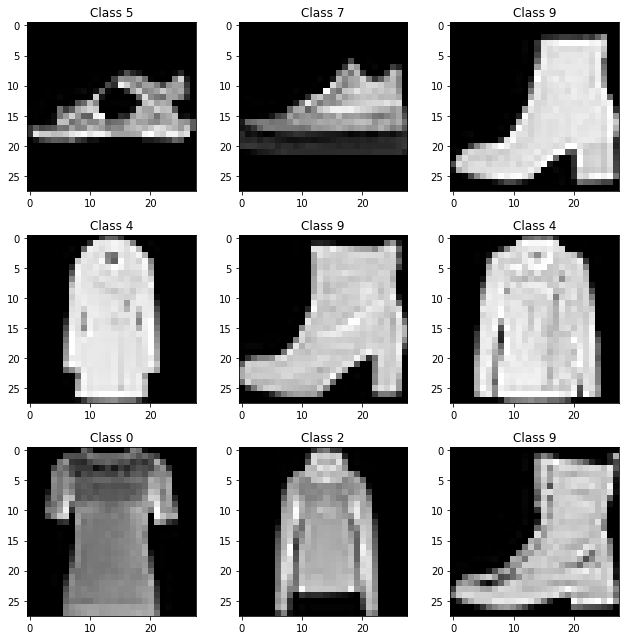

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # agrandir les images
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
# Encode the training set
encoded_images = X_test.reshape(-1,28*28)

In [ ]:
# Cluster the training set
kmeans = KMeans(n_clusters=10 , max_iter = 1 )
clustered_training_set = kmeans.fit_predict(encoded_images)

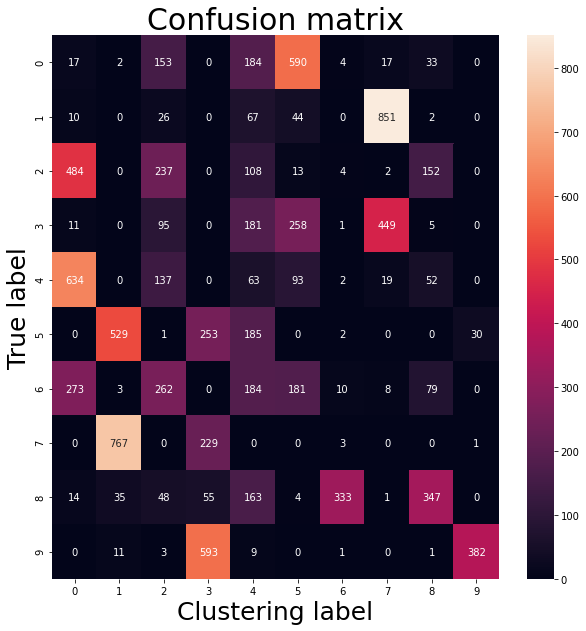

In [ ]:
# comparer les resultas de clustring avec les classes reelles
cm = confusion_matrix(y_test, clustered_training_set)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

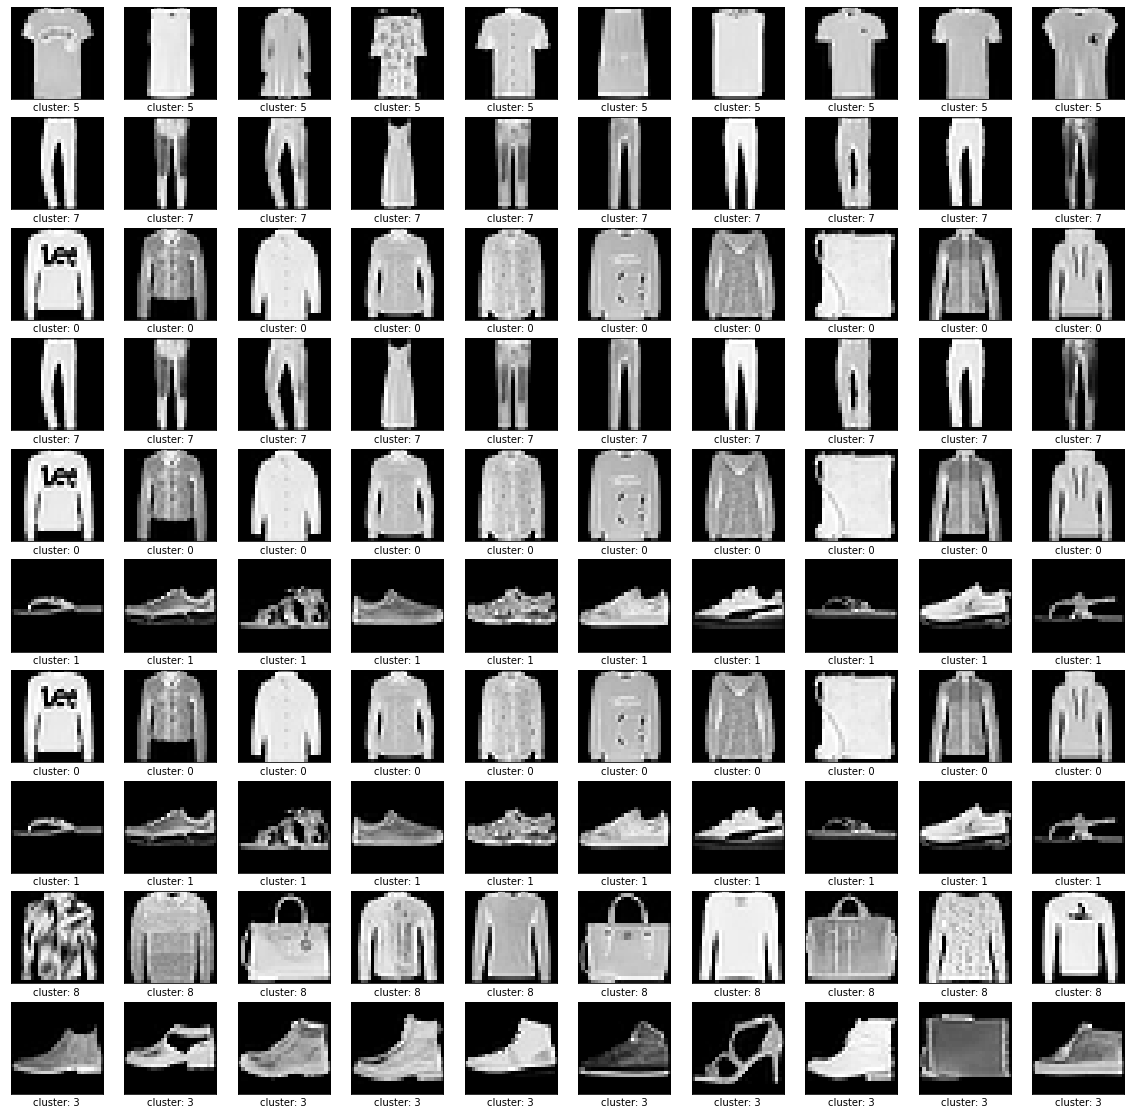

In [ ]:
# afficher 10 images de chaque  cluster
fig = plt.figure(figsize=(20,20))
for r in range(10):
    cluster = cm[r].argmax()
    for c, val in enumerate(X_test[clustered_training_set == cluster][0:10]):
        fig.add_subplot(10, 10, 10*r+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        